In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-data/cleaned_customer_data.csv


In [106]:
cleaned_df = pd.read_csv('/kaggle/input/cleaned-data/cleaned_customer_data.csv')
cleaned_df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
2,3,6812.0,2.11,9.79
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
...,...,...,...,...
559972,559998,20502.0,7.02,9.23
559973,559999,3876.0,1.14,2.84
559974,560000,1556.0,2.32,3.48
559975,322880,14232.0,2.97,4.80


# Scaling the data

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming the dataset is loaded into a DataFrame named 'customer_data'
# Normalize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cleaned_df[['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']])


# Using K-Means clustering algorithm 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

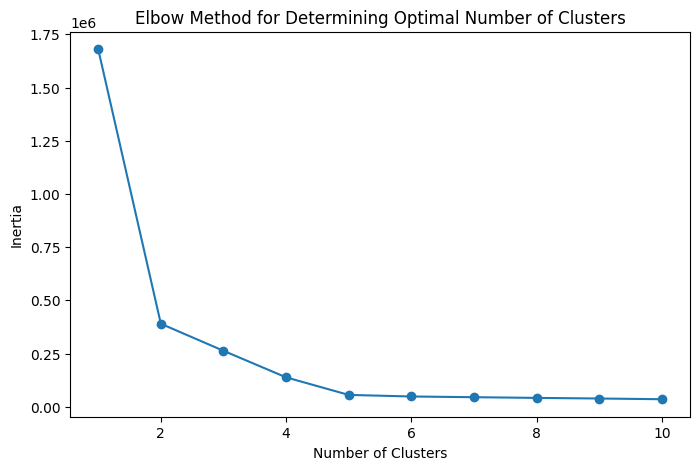

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
range_clusters = range(1, 11)
for n in range_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

In [109]:
# Let's assume the optimal number of clusters determined from the Elbow method is 4
optimal_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
cleaned_df['cluster'] = kmeans.fit_predict(scaled_df)

cleaned_df

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
0,1,790.0,1.11,2.84,2
1,2,176875.0,15.74,33.83,1
2,3,6812.0,2.11,9.79,2
3,4,38542.0,7.82,10.73,0
4,5,48712.0,7.51,10.04,0
...,...,...,...,...,...
559972,559998,20502.0,7.02,9.23,0
559973,559999,3876.0,1.14,2.84,2
559974,560000,1556.0,2.32,3.48,2
559975,322880,14232.0,2.97,4.80,2


## Visualization

In [ ]:
import seaborn as sns

# Plot the clusters
# We will use pairplot to visualize the clusters in the three-dimensional space
sns.pairplot(cleaned_df, hue='cluster', diag_kind='kde', 
             vars=['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

## Defining the rules for each customer segment

In [56]:
data1 = cleaned_df[cleaned_df['cluster']==0]
data2 = cleaned_df[cleaned_df['cluster']==1]
data3 = cleaned_df[cleaned_df['cluster']==2]
data4 = cleaned_df[cleaned_df['cluster']==3]
data5 = cleaned_df[cleaned_df['cluster']==4]

In [57]:
data1.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,201867.000000,201867.000000,201867.000000,201867.000000,201867.0
mean,279583.753853,35417.025651,6.006943,10.010810,0.0
std,161503.696952,10144.677265,1.176451,0.751015,0.0
min,4.000000,10078.000000,4.000000,3.710000,0.0
25%,139378.500000,27666.500000,5.020000,9.500000,0.0
50%,280089.000000,34851.000000,5.970000,9.970000,0.0
75%,419017.500000,42550.000000,6.990000,10.490000,0.0
max,559998.000000,109993.000000,11.910000,19.980000,0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


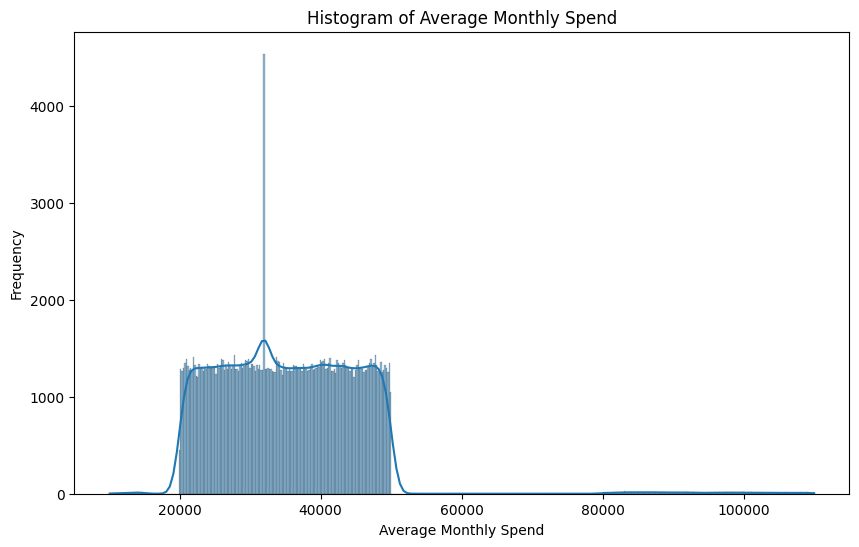

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a DataFrame named 'customer_data'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data1['average_monthly_spend'], bins=500, kde=True)
plt.xlabel('Average Monthly Spend')
plt.ylabel('Frequency')
plt.title('Histogram of Average Monthly Spend')
plt.show()

In [59]:
data1[data1['average_monthly_spend']<60000].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,200197.000000,200197.000000,200197.000000,200197.000000,200197.0
mean,279626.605319,34928.798783,5.988527,9.984902,0.0
std,161484.909624,8622.247471,1.144087,0.598714,0.0
min,4.000000,10078.000000,4.000000,3.710000,0.0
25%,139482.000000,27609.000000,5.020000,9.500000,0.0
50%,280121.000000,34727.000000,5.960000,9.980000,0.0
75%,419013.000000,42376.000000,6.980000,10.480000,0.0
max,559998.000000,49999.000000,7.990000,10.990000,0.0


In [60]:
data1[data1['average_monthly_spend']>18000].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,201661.000000,201661.000000,201661.000000,201661.000000,201661.0
mean,279556.687981,35439.619574,6.007359,10.016387,0.0
std,161507.123107,10125.109726,1.176980,0.730768,0.0
min,4.000000,20000.000000,4.000000,9.000000,0.0
25%,139334.000000,27687.000000,5.020000,9.510000,0.0
50%,280045.000000,34865.000000,5.970000,9.980000,0.0
75%,418999.000000,42558.000000,6.990000,10.490000,0.0
max,559998.000000,109993.000000,11.910000,19.980000,0.0


data1 - spend - 20000-49999

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


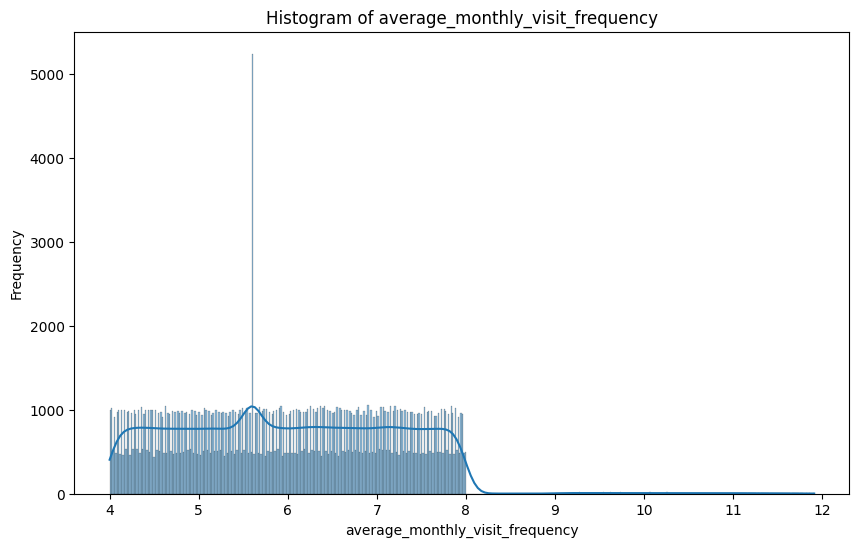

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a DataFrame named 'customer_data'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data1['average_monthly_visit_frequency'], bins=500, kde=True)
plt.xlabel('average_monthly_visit_frequency')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_visit_frequency')
plt.show()

In [62]:
data1[data1['average_monthly_visit_frequency']<8.5].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,200916.000000,200916.000000,200916.000000,200916.000000,200916.0
mean,279611.878536,35143.086036,5.987137,10.011855,0.0
std,161500.361019,9334.310104,1.142273,0.752636,0.0
min,4.000000,10078.000000,4.000000,3.710000,0.0
25%,139432.500000,27633.000000,5.020000,9.500000,0.0
50%,280122.500000,34783.000000,5.960000,9.980000,0.0
75%,419034.250000,42451.000000,6.970000,10.490000,0.0
max,559998.000000,109993.000000,7.990000,19.980000,0.0


data1 -frequency - 4 - 7.99

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


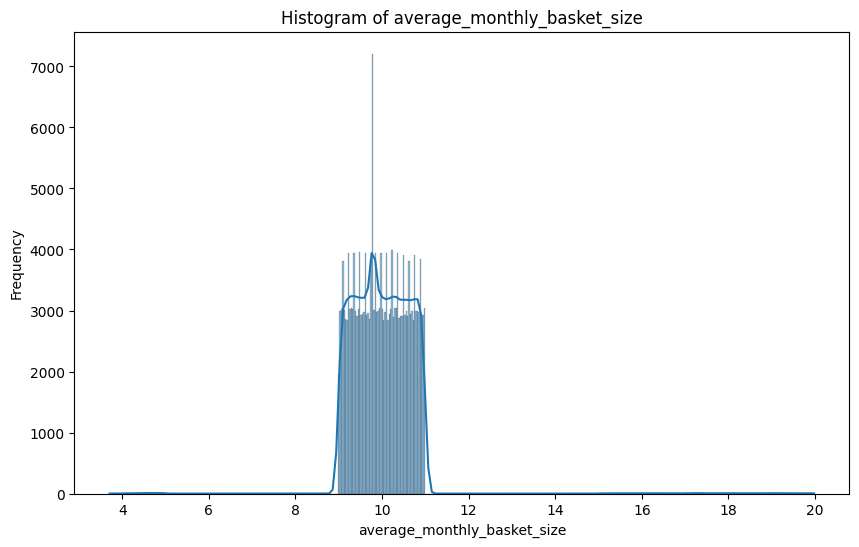

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a DataFrame named 'customer_data'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data1['average_monthly_basket_size'], bins=500, kde=True)
plt.xlabel('average_monthly_basket_size')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_basket_size')
plt.show()

In [64]:
data1[data1['average_monthly_basket_size']>8.0].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,201661.000000,201661.000000,201661.000000,201661.000000,201661.0
mean,279556.687981,35439.619574,6.007359,10.016387,0.0
std,161507.123107,10125.109726,1.176980,0.730768,0.0
min,4.000000,20000.000000,4.000000,9.000000,0.0
25%,139334.000000,27687.000000,5.020000,9.510000,0.0
50%,280045.000000,34865.000000,5.970000,9.980000,0.0
75%,418999.000000,42558.000000,6.990000,10.490000,0.0
max,559998.000000,109993.000000,11.910000,19.980000,0.0


In [65]:
data1[data1['average_monthly_basket_size']<12.0].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,201148.000000,201148.000000,201148.000000,201148.000000,201148.0
mean,279598.310478,35204.730711,6.008398,9.983980,0.0
std,161488.333412,9505.912496,1.178300,0.597447,0.0
min,4.000000,10078.000000,4.000000,3.710000,0.0
25%,139434.750000,27642.000000,5.020000,9.500000,0.0
50%,280087.500000,34798.000000,5.970000,9.970000,0.0
75%,418998.250000,42476.000000,6.990000,10.480000,0.0
max,559998.000000,109893.000000,11.910000,10.990000,0.0


data1 - basket - 9.00-10.99

In [66]:
data2.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,48285.000000,48285.000000,48285.000000,48285.000000,48285.0
mean,279160.432929,160055.083421,14.911760,30.319677,1.0
std,161982.784056,11480.792870,1.044693,3.641605,0.0
min,2.000000,100344.000000,5.600000,9.790000,1.0
25%,139184.000000,150211.000000,14.480000,27.660000,1.0
50%,277315.000000,160127.000000,14.990000,30.430000,1.0
75%,420431.000000,169888.000000,15.490000,33.200000,1.0
max,559968.000000,179998.000000,19.960000,37.960000,1.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


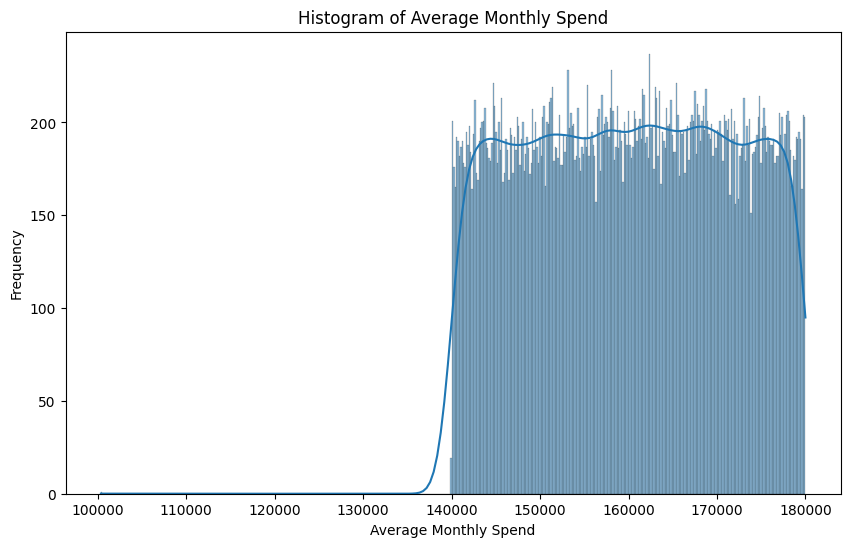

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a DataFrame named 'customer_data'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data2['average_monthly_spend'], bins=500, kde=True)
plt.xlabel('Average Monthly Spend')
plt.ylabel('Frequency')
plt.title('Histogram of Average Monthly Spend')
plt.show()

In [68]:
data2[data2['average_monthly_spend']>110000].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,48284.000000,48284.000000,48284.000000,48284.000000,48284.0
mean,279159.536555,160056.320085,14.911655,30.319519,1.0
std,161984.341722,11477.695293,1.044451,3.641477,0.0
min,2.000000,140000.000000,5.600000,9.790000,1.0
25%,139183.500000,150212.500000,14.480000,27.660000,1.0
50%,277313.000000,160127.500000,14.990000,30.430000,1.0
75%,420431.250000,169888.000000,15.490000,33.200000,1.0
max,559968.000000,179998.000000,15.990000,37.960000,1.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


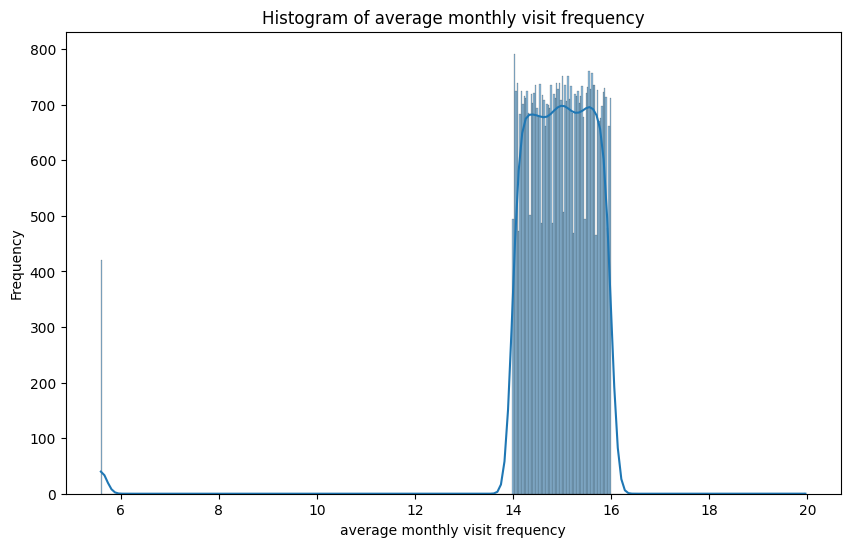

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a DataFrame named 'customer_data'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data2['average_monthly_visit_frequency'], bins=500, kde=True)
plt.xlabel('average monthly visit frequency')
plt.ylabel('Frequency')
plt.title('Histogram of average monthly visit frequency')
plt.show()

In [70]:
data2[data2['average_monthly_visit_frequency']>13].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,47865.000000,47865.000000,47865.000000,47865.000000,47865.0
mean,279092.769999,159972.233135,14.993468,30.323767,1.0
std,162021.080658,11479.671903,0.577430,3.645643,0.0
min,2.000000,100344.000000,14.000000,9.790000,1.0
25%,139061.000000,150116.000000,14.490000,27.670000,1.0
50%,277311.000000,159993.000000,15.000000,30.440000,1.0
75%,420432.000000,169799.000000,15.490000,33.200000,1.0
max,559968.000000,179998.000000,19.960000,37.960000,1.0


In [71]:
data2[data2['average_monthly_visit_frequency']<17].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,48284.000000,48284.000000,48284.000000,48284.000000,48284.0
mean,279159.536555,160056.320085,14.911655,30.319519,1.0
std,161984.341722,11477.695293,1.044451,3.641477,0.0
min,2.000000,140000.000000,5.600000,9.790000,1.0
25%,139183.500000,150212.500000,14.480000,27.660000,1.0
50%,277313.000000,160127.500000,14.990000,30.430000,1.0
75%,420431.250000,169888.000000,15.490000,33.200000,1.0
max,559968.000000,179998.000000,15.990000,37.960000,1.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


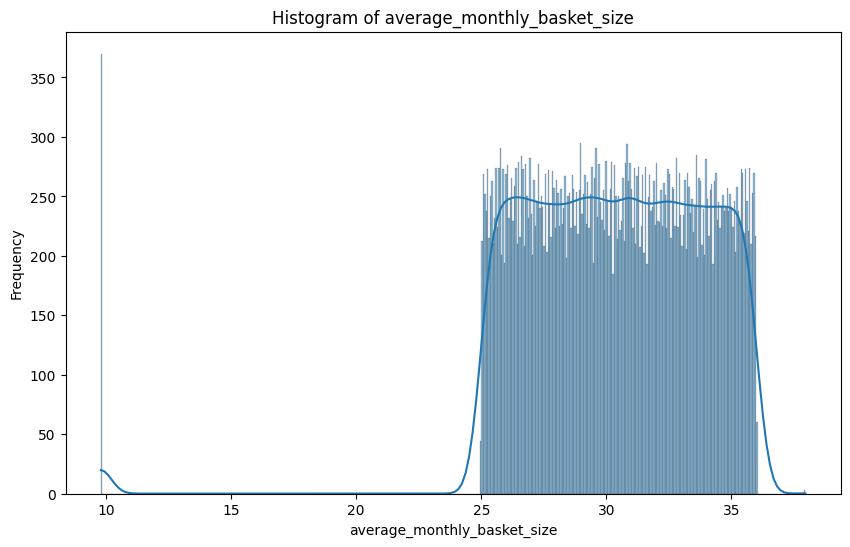

In [72]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data2['average_monthly_basket_size'], bins=500, kde=True)
plt.xlabel('average_monthly_basket_size')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_basket_size')
plt.show()

In [73]:
data2[data2['average_monthly_basket_size']>22].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,47915.000000,47915.000000,47915.000000,47915.000000,47915.0
mean,279221.545111,159978.383450,14.911787,30.478207,1.0
std,161951.081522,11480.610077,1.047579,3.175519,0.0
min,2.000000,100344.000000,5.600000,25.000000,1.0
25%,139373.000000,150130.500000,14.480000,27.730000,1.0
50%,277311.000000,159986.000000,14.990000,30.470000,1.0
75%,420437.000000,169803.000000,15.490000,33.220000,1.0
max,559968.000000,179998.000000,19.960000,37.960000,1.0


In [74]:
data2[data2['average_monthly_basket_size']<37.5].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,48282.000000,48282.000000,48282.000000,48282.000000,48282.0
mean,279157.716230,160056.781306,14.911622,30.319202,1.0
std,161987.449714,11477.651178,1.044459,3.641220,0.0
min,2.000000,140000.000000,5.600000,9.790000,1.0
25%,139182.500000,150213.500000,14.480000,27.660000,1.0
50%,277306.000000,160128.000000,14.990000,30.430000,1.0
75%,420431.750000,169888.000000,15.490000,33.200000,1.0
max,559968.000000,179998.000000,15.990000,35.990000,1.0


In [75]:
data3.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,199791.000000,199791.000000,199791.000000,199791.000000,199791.0
mean,280309.741079,7908.162560,2.050696,3.142490,2.0
std,161648.271427,5341.888532,0.725071,1.385736,0.0
min,1.000000,0.000000,0.000000,1.560000,2.0
25%,140609.500000,3804.000000,1.500000,2.010000,2.0
50%,280270.000000,7608.000000,2.010000,3.020000,2.0
75%,420573.000000,11430.000000,2.520000,4.040000,2.0
max,560000.000000,31970.000000,5.600000,9.790000,2.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


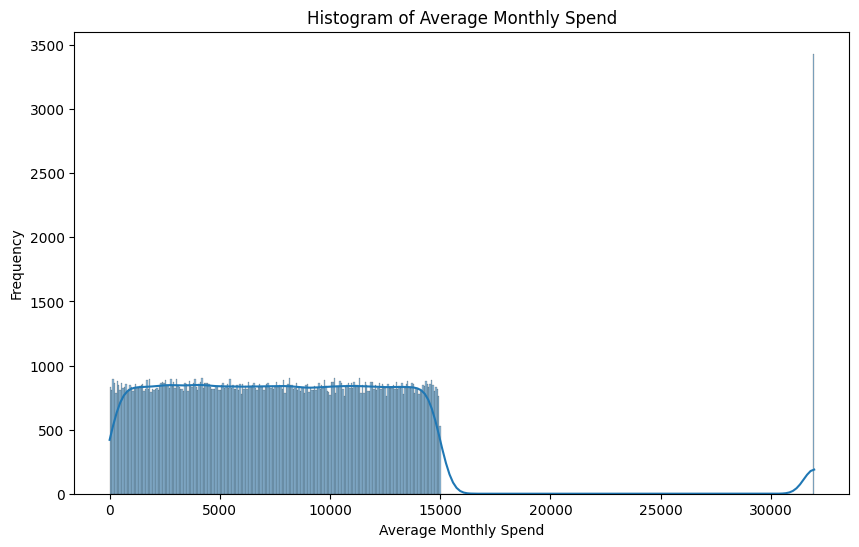

In [76]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data3['average_monthly_spend'], bins=500, kde=True)
plt.xlabel('Average Monthly Spend')
plt.ylabel('Frequency')
plt.title('Histogram of Average Monthly Spend')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


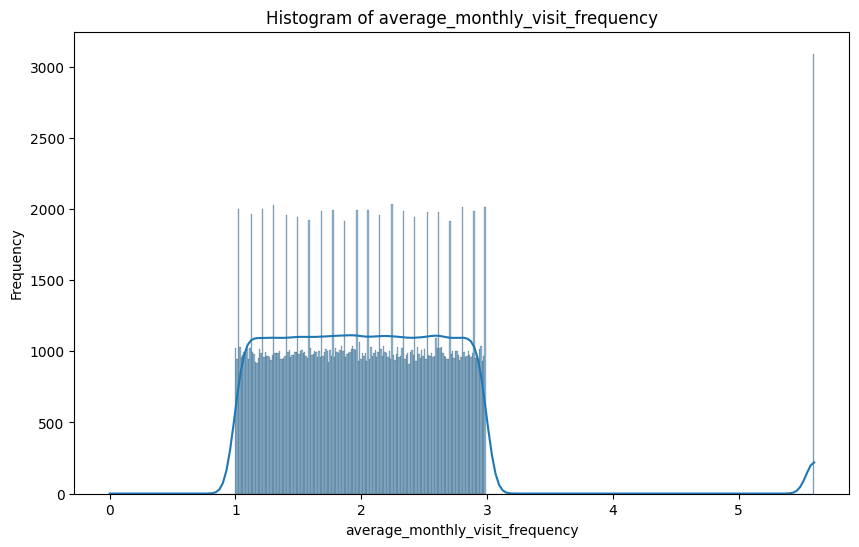

In [77]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data3['average_monthly_visit_frequency'], bins=500, kde=True)
plt.xlabel('average_monthly_visit_frequency')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_visit_frequency')
plt.show()

In [78]:
data3[data3['average_monthly_visit_frequency']>0.5].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,199789.000000,199789.000000,199789.000000,199789.000000,199789.0
mean,280309.297809,7908.241725,2.050717,3.142506,2.0
std,161649.019771,5341.856671,0.725046,1.385734,0.0
min,1.000000,0.000000,1.000000,1.560000,2.0
25%,140608.000000,3805.000000,1.500000,2.010000,2.0
50%,280265.000000,7608.000000,2.010000,3.020000,2.0
75%,420574.000000,11430.000000,2.520000,4.040000,2.0
max,560000.000000,31970.000000,5.600000,9.790000,2.0


In [79]:
data3[data3['average_monthly_visit_frequency']<3.15].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,196699.000000,196699.000000,196699.000000,196699.000000,196699.0
mean,280358.574431,7920.970457,1.994915,3.145665,2.0
std,161681.397976,5357.416487,0.576984,1.390059,0.0
min,1.000000,0.000000,0.000000,1.560000,2.0
25%,140559.500000,3810.000000,1.500000,2.010000,2.0
50%,280385.000000,7618.000000,1.990000,3.020000,2.0
75%,420744.000000,11445.000000,2.490000,4.040000,2.0
max,560000.000000,31970.000000,2.990000,9.790000,2.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


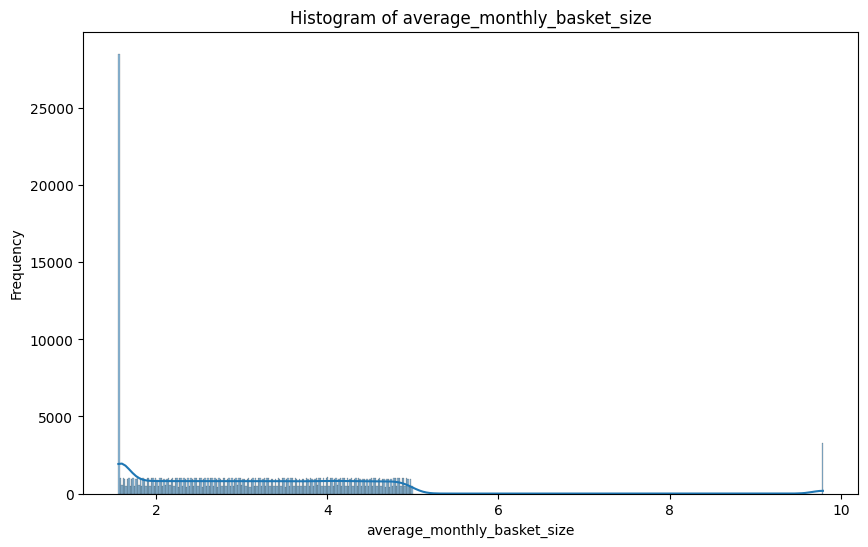

In [80]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data3['average_monthly_basket_size'], bins=500, kde=True)
plt.xlabel('average_monthly_basket_size')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_basket_size')
plt.show()

In [81]:
data3[data3['average_monthly_basket_size']<6].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,196503.000000,196503.000000,196503.000000,196503.000000,196503.0
mean,280353.782151,7914.782812,2.051677,3.031260,2.0
std,161674.582450,5356.983331,0.727095,1.095727,0.0
min,1.000000,0.000000,0.000000,1.560000,2.0
25%,140626.500000,3805.000000,1.510000,1.990000,2.0
50%,280342.000000,7610.000000,2.010000,2.990000,2.0
75%,420663.000000,11435.000000,2.520000,3.990000,2.0
max,560000.000000,31970.000000,5.600000,4.990000,2.0


In [82]:
data4.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,40183.000000,40183.000000,40183.000000,40183.000000,40183.0
mean,281306.676331,94361.652589,19.127613,17.265597,3.0
std,162041.721596,13728.396263,0.939564,2.080085,0.0
min,54.000000,31970.000000,10.620000,9.790000,3.0
25%,140928.000000,87201.000000,18.850000,16.110000,3.0
50%,281185.000000,94953.000000,19.230000,17.410000,3.0
75%,422244.500000,102683.000000,19.620000,18.720000,3.0
max,559984.000000,165094.000000,19.990000,29.010000,3.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


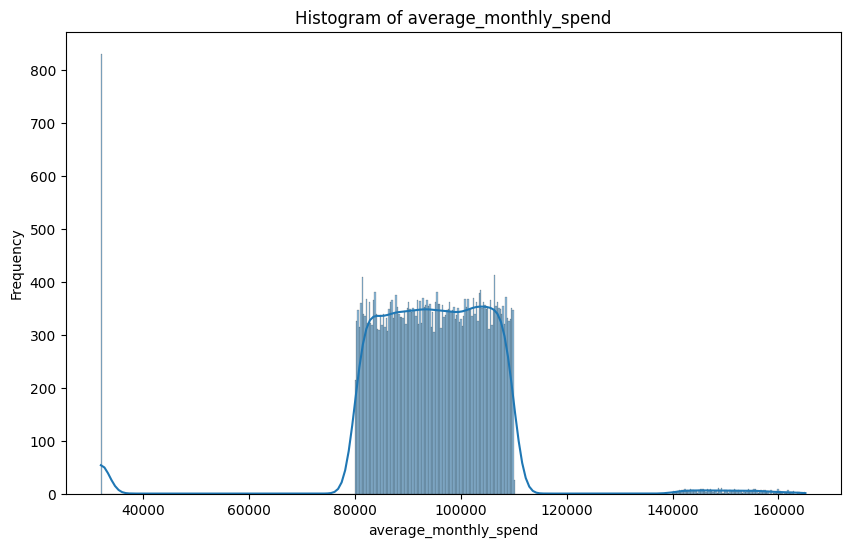

In [83]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data4['average_monthly_spend'], bins=500, kde=True)
plt.xlabel('average_monthly_spend')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_spend')
plt.show()

In [84]:
data4[data4['average_monthly_spend']>75000].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,39352.000000,39352.000000,39352.000000,39352.000000,39352.0
mean,281308.629168,95679.183167,19.141974,17.222731,3.0
std,162016.690729,10416.714952,0.911861,2.003265,0.0
min,54.000000,80000.000000,10.620000,9.790000,3.0
25%,140933.000000,87687.000000,18.850000,16.100000,3.0
50%,281260.500000,95284.500000,19.230000,17.400000,3.0
75%,422152.750000,102844.250000,19.620000,18.700000,3.0
max,559984.000000,165094.000000,19.990000,19.990000,3.0


In [85]:
data4[data4['average_monthly_spend']<120000].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,39747.000000,39747.000000,39747.000000,39747.000000,39747.0
mean,281382.944776,93743.467507,19.171752,17.347600,3.0
std,161976.063571,12444.322293,0.842324,1.937642,0.0
min,54.000000,31970.000000,10.620000,9.790000,3.0
25%,141054.500000,87118.000000,18.860000,16.150000,3.0
50%,281288.000000,94761.000000,19.240000,17.440000,3.0
75%,422251.500000,102447.500000,19.630000,18.730000,3.0
max,559984.000000,109999.000000,19.990000,29.010000,3.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


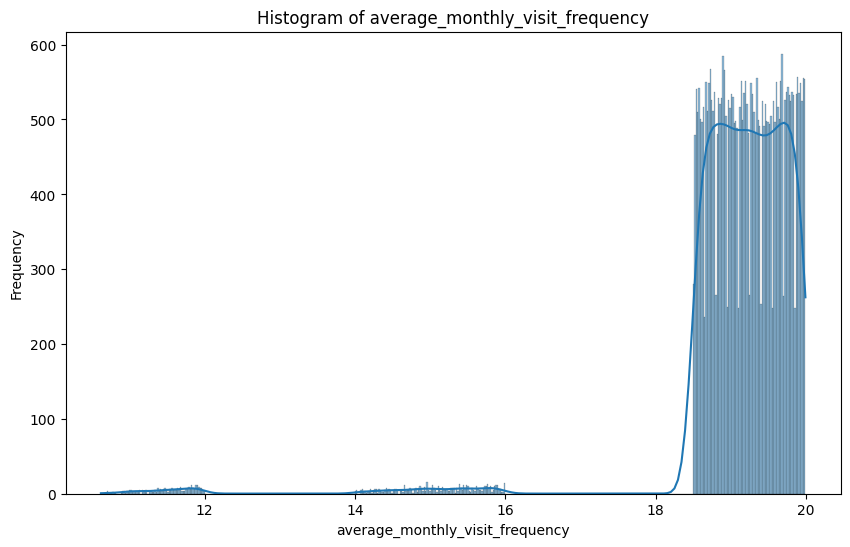

In [86]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data4['average_monthly_visit_frequency'], bins=500, kde=True)
plt.xlabel('average_monthly_visit_frequency')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_visit_frequency')
plt.show()

In [87]:
data4[data4['average_monthly_visit_frequency']>18].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,39273.000000,39273.000000,39273.000000,39273.000000,39273.0
mean,281302.348993,93952.300563,19.248078,17.367116,3.0
std,161956.381880,11814.060428,0.435173,1.730363,0.0
min,54.000000,31970.000000,18.500000,9.790000,3.0
25%,140998.000000,87163.000000,18.870000,16.180000,3.0
50%,281154.000000,94752.000000,19.250000,17.450000,3.0
75%,422155.000000,102422.000000,19.630000,18.720000,3.0
max,559984.000000,109999.000000,19.990000,19.990000,3.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


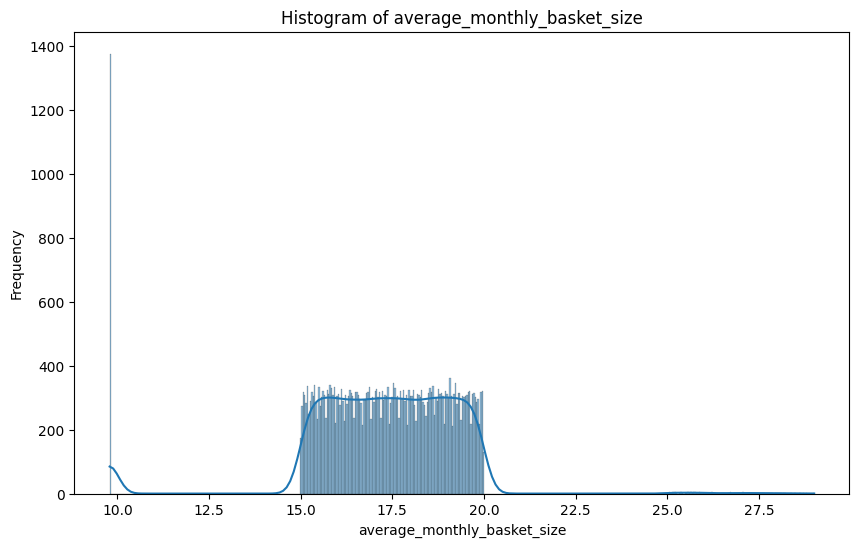

In [88]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data4['average_monthly_basket_size'], bins=500, kde=True)
plt.xlabel('average_monthly_basket_size')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_basket_size')
plt.show()

In [89]:
data4[data4['average_monthly_basket_size']>14].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,38806.000000,38806.000000,38806.000000,38806.000000,38806.0
mean,281238.948281,93647.732464,19.230158,17.530863,3.0
std,162002.999696,12515.623210,0.509249,1.557835,0.0
min,74.000000,31970.000000,14.080000,15.000000,3.0
25%,140923.000000,87039.000000,18.870000,16.240000,3.0
50%,281055.500000,94655.500000,19.240000,17.510000,3.0
75%,422022.500000,102378.750000,19.630000,18.760000,3.0
max,559984.000000,109999.000000,19.990000,29.010000,3.0


In [90]:
data4[data4['average_monthly_basket_size']<21].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,40014.000000,40014.000000,40014.000000,40014.000000,40014.0
mean,281337.754086,94625.165092,19.144044,17.226799,3.0
std,162034.585967,13143.593657,0.906228,1.995555,0.0
min,54.000000,31970.000000,10.620000,9.790000,3.0
25%,140945.250000,87309.000000,18.850000,16.100000,3.0
50%,281198.500000,95023.000000,19.230000,17.400000,3.0
75%,422264.000000,102712.000000,19.620000,18.700000,3.0
max,559984.000000,165094.000000,19.990000,19.990000,3.0


In [91]:
data5.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,69851.000000,69851.000000,69851.00000,69851.000000,69851.0
mean,280149.617643,93598.574967,10.42693,36.991595,4.0
std,161662.802134,13987.883411,1.20569,1.251437,0.0
min,9.000000,0.000000,5.60000,19.770000,4.0
25%,139829.500000,86876.500000,9.70000,36.190000,4.0
50%,280319.000000,94570.000000,10.48000,37.450000,4.0
75%,419698.000000,102353.000000,11.25000,37.960000,4.0
max,559995.000000,167865.000000,15.99000,37.960000,4.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


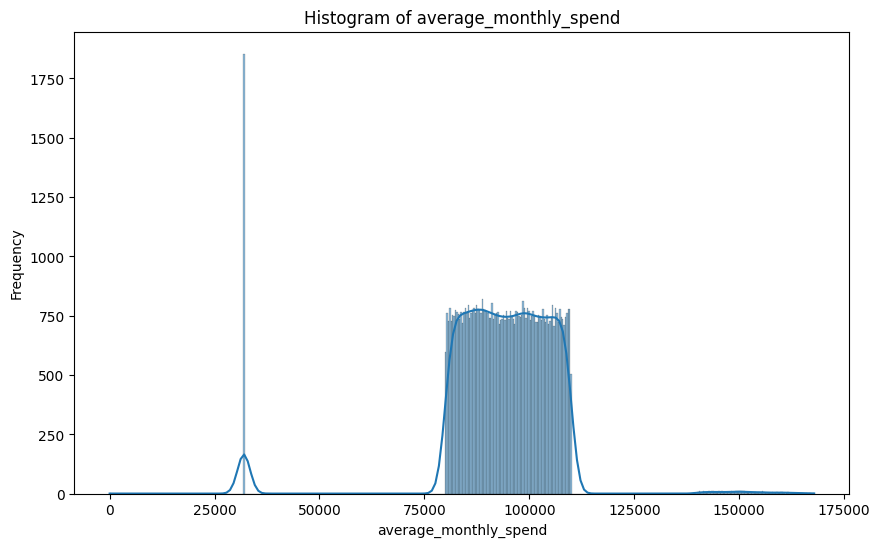

In [92]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data5['average_monthly_spend'], bins=500, kde=True)
plt.xlabel('average_monthly_spend')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_spend')
plt.show()

In [93]:
data5[data5['average_monthly_spend']>75000].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,67994.000000,67994.000000,67994.000000,67994.000000,67994.0
mean,280160.291570,95282.667735,10.380922,37.044721,4.0
std,161651.052475,9710.340241,1.129596,1.106654,0.0
min,9.000000,80001.000000,5.600000,19.770000,4.0
25%,139812.250000,87481.000000,9.690000,36.222500,4.0
50%,280189.000000,94991.000000,10.470000,37.470000,4.0
75%,419632.750000,102555.750000,11.220000,37.960000,4.0
max,559995.000000,167865.000000,11.990000,37.960000,4.0


In [94]:
data5[data5['average_monthly_spend']<120000].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,69427.000000,69427.000000,69427.000000,69427.000000,69427.0
mean,280209.050629,93249.053466,10.456408,37.026214,4.0
std,161685.421980,13283.366331,1.148653,1.151047,0.0
min,9.000000,0.000000,5.600000,19.770000,4.0
25%,139810.000000,86835.500000,9.710000,36.210000,4.0
50%,280440.000000,94483.000000,10.490000,37.470000,4.0
75%,419868.000000,102212.500000,11.250000,37.960000,4.0
max,559995.000000,109999.000000,15.990000,37.960000,4.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


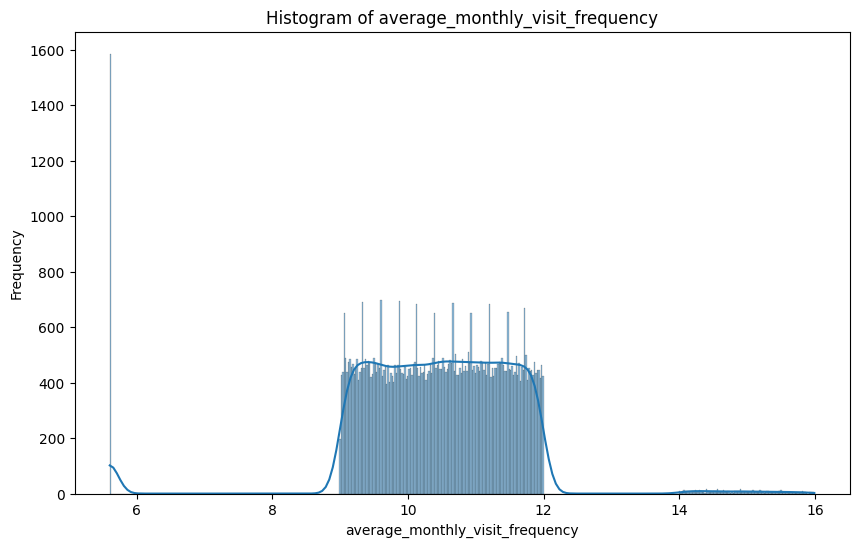

In [95]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data5['average_monthly_visit_frequency'], bins=500, kde=True)
plt.xlabel('average_monthly_visit_frequency')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_visit_frequency')
plt.show()

In [96]:
data5[data5['average_monthly_visit_frequency']>8].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,68265.000000,68265.000000,68265.000000,68265.000000,68265.0
mean,280306.118758,93227.053190,10.539074,37.024942,4.0
std,161667.377229,13345.477324,0.966213,1.150182,0.0
min,9.000000,0.000000,9.000000,25.520000,4.0
25%,139858.000000,86837.000000,9.750000,36.210000,4.0
50%,280632.000000,94491.000000,10.520000,37.460000,4.0
75%,420042.000000,102213.000000,11.270000,37.960000,4.0
max,559995.000000,109999.000000,15.990000,37.960000,4.0


In [97]:
data5[data5['average_monthly_visit_frequency']<13].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,69168.000000,69168.000000,69168.000000,69168.000000,69168.0
mean,280101.691158,94207.589059,10.382961,37.045540,4.0
std,161640.463874,12635.093426,1.125729,1.104542,0.0
min,9.000000,0.000000,5.600000,19.770000,4.0
25%,139799.000000,87103.000000,9.690000,36.230000,4.0
50%,280177.500000,94717.500000,10.470000,37.480000,4.0
75%,419520.500000,102429.250000,11.220000,37.960000,4.0
max,559995.000000,167865.000000,11.990000,37.960000,4.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


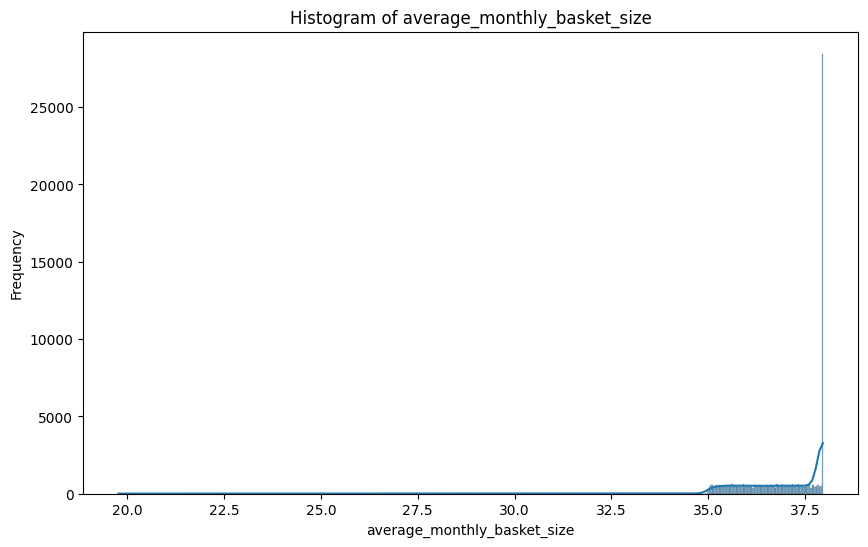

In [98]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data5['average_monthly_basket_size'], bins=500, kde=True)
plt.xlabel('average_monthly_basket_size')
plt.ylabel('Frequency')
plt.title('Histogram of average_monthly_basket_size')
plt.show()

In [99]:
data5[data5['average_monthly_basket_size']>34.8].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,68867.000000,68867.000000,68867.000000,68867.000000,68867.0
mean,280152.740848,93839.358256,10.413732,37.078283,4.0
std,161676.315065,12124.779954,1.082086,0.982567,0.0
min,9.000000,0.000000,5.600000,34.810000,4.0
25%,139747.500000,87044.000000,9.700000,36.240000,4.0
50%,280268.000000,94621.000000,10.480000,37.490000,4.0
75%,419759.000000,102298.000000,11.230000,37.960000,4.0
max,559995.000000,167865.000000,15.960000,37.960000,4.0


## Using percentile approach for rules

In [100]:
import pandas as pd

# Define the average monthly spend data ranges
ranges = [20000, 49000,140000, 179998, 0, 15000, 80000, 109999]

# Define the labels for the percentile ranges
labels = ['data1', 'data2', 'data3', 'data4', 'data5','data6','data7','data8']

# Define the minimum and maximum values
min_value = 0
max_value = 179998

# Calculate the percentile step
percentile_step = (max_value - min_value) / 100

# Calculate the percentiles for each range
percentiles = [int((range_value - min_value) / percentile_step) for range_value in ranges]

# Create a dictionary mapping ranges to percentiles
range_percentile_map = dict(zip(labels, percentiles))

print("for average spend")
# Print the range and corresponding percentile values
for label, percentile in range_percentile_map.items():
    print(f"{label}: {percentile}%")

for average spend
data1: 11%
data2: 27%
data3: 77%
data4: 100%
data5: 0%
data6: 8%
data7: 44%
data8: 61%


In [101]:
import pandas as pd

# Define the average monthly spend data ranges
ranges = [4.00,7.99,14.0,15.99,1,2.99,18.5,19.99,9,11.99]

# Define the labels for the percentile ranges
labels = ['data1', 'data2', 'data3', 'data4', 'data5','data6','data7','data8','data9', 'data10']

# Define the minimum and maximum values
min_value = 1
max_value = 19.99

# Calculate the percentile step
percentile_step = (max_value - min_value) / 100

# Calculate the percentiles for each range
percentiles = [int((range_value - min_value) / percentile_step) for range_value in ranges]

# Create a dictionary mapping ranges to percentiles
range_percentile_map = dict(zip(labels, percentiles))

print("for average frequency")
# Print the range and corresponding percentile values
for label, percentile in range_percentile_map.items():
    print(f"{label}: {percentile}%")

for average frequency
data1: 15%
data2: 36%
data3: 68%
data4: 78%
data5: 0%
data6: 10%
data7: 92%
data8: 100%
data9: 42%
data10: 57%


In [102]:
import pandas as pd

# Define the average monthly spend data ranges
ranges = [9.00, 10.99, 25, 35.99, 1.56, 4.99,15,19.99,35.99,37.96]

# Define the labels for the percentile ranges
labels = ['data1', 'data2', 'data3', 'data4', 'data5','data6','data7','data8','data9', 'data10']

# Define the minimum and maximum values
min_value = 1.56
max_value = 37.96

# Calculate the percentile step
percentile_step = (max_value - min_value) / 100

# Calculate the percentiles for each range
percentiles = [int((range_value - min_value) / percentile_step) for range_value in ranges]

# Create a dictionary mapping ranges to percentiles
range_percentile_map = dict(zip(labels, percentiles))

print("for average basket size")
# Print the range and corresponding percentile values
for label, percentile in range_percentile_map.items():
    print(f"{label}: {percentile}%")

for average basket size
data1: 20%
data2: 25%
data3: 64%
data4: 94%
data5: 0%
data6: 9%
data7: 36%
data8: 50%
data9: 94%
data10: 100%


In [103]:
cleaned_df['segment'] = cleaned_df['cluster'].map({
    0: 'Medium level',
    1: 'High Premium',
    2: 'Low level',
    3: 'High Frequent',
    4: 'High-Loyal'
})

In [104]:
cleaned_df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster,segment
0,1,790.0,1.11,2.84,2,Low level
1,2,176875.0,15.74,33.83,1,High Premium
2,3,6812.0,2.11,9.79,2,Low level
3,4,38542.0,7.82,10.73,0,Medium level
4,5,48712.0,7.51,10.04,0,Medium level
...,...,...,...,...,...,...
559972,559998,20502.0,7.02,9.23,0,Medium level
559973,559999,3876.0,1.14,2.84,2,Low level
559974,560000,1556.0,2.32,3.48,2,Low level
559975,322880,14232.0,2.97,4.80,2,Low level


---
## **Finalized Rules**
### High end - Premium
* spend        77% - 100%
* frequency    68% - 78%
* basket size  64% - 94%

### High end - Loyal 
* spend 44% - 61%
* frequency 42% - 57%
* basket size 94% - 100%

### High end - Frequent
* spend 44% - 61%
* frequency 92% - 100% 
* basket size 36% - 50%

### Medium Level
* spend 11% - 27%
* frequency 15% - 36%
* basket size 20% - 25%

### Low Level
* spend 0% - 8%
* frequency 0% - 10%
* basket size 0% - 9%

---